In [3]:
from pyneuroml import pynml
from matplotlib import pyplot as plt
%matplotlib inline
import numpy

lems_files = ['LEMS_NoisyCurrentInput_test.xml','LEMS_OUCurrentInput_test.xml']
all_results = {}


for lems_file in lems_files:
    
    all_results[lems_file] = pynml.run_lems_with_jneuroml(lems_file, nogui=True, load_saved_data=True)
    print("Finished running LEMS file: %s"%lems_file)

pyNeuroML >>> Reloading data specified in LEMS file: LEMS_NoisyCurrentInput_test.xml (/Users/padraig/neuroConstruct/osb/showcase/StochasticityShowcase/NeuroML2/LEMS_NoisyCurrentInput_test.xml), base_dir: ., cwd: /Users/padraig/neuroConstruct/osb/showcase/StochasticityShowcase/NeuroML2
Finished running LEMS file: LEMS_NoisyCurrentInput_test.xml
pyNeuroML >>> Reloading data specified in LEMS file: LEMS_OUCurrentInput_test.xml (/Users/padraig/neuroConstruct/osb/showcase/StochasticityShowcase/NeuroML2/LEMS_OUCurrentInput_test.xml), base_dir: ., cwd: /Users/padraig/neuroConstruct/osb/showcase/StochasticityShowcase/NeuroML2
Finished running LEMS file: LEMS_OUCurrentInput_test.xml


Reloaded data: ['Pop0/3/IF_curr_exp/noisyCurrentSource3/i', 'Pop0/2/IF_curr_exp/v', 'Pop0/1/IF_curr_exp/noisyCurrentSource1/i', 'Pop0/1/IF_curr_exp/v', 'Pop0/3/IF_curr_exp/v', 'Pop0/2/IF_curr_exp/noisyCurrentSource2/i', 'Pop0/0/IF_curr_exp/v', 'Pop0/0/IF_curr_exp/pulseGen0/i', u't']
pyNeuroML >>> Generating plot: Currents generated from LEMS_NoisyCurrentInput_test.xml
pyNeuroML >>> Loaded data from ../PyNN/noise_current_nest_5.0.dat; columns: [0]
pyNeuroML >>> Loaded data from ../PyNN/noise_current_nest_2.0.dat; columns: [0]
pyNeuroML >>> Loaded data from ../PyNN/noise_current_nest_1.0.dat; columns: [0]
pyNeuroML >>> Generating plot: Histogram of current amplitudes from LEMS_NoisyCurrentInput_test.xml
Reloaded data: ['Pop0/3/IF_curr_exp/noisyCurrentSource3/i', 'Pop0/2/IF_curr_exp/v', 'Pop0/1/IF_curr_exp/noisyCurrentSource1/i', 'Pop0/1/IF_curr_exp/v', 'Pop0/3/IF_curr_exp/v', 'Pop0/2/IF_curr_exp/noisyCurrentSource2/i', 'Pop0/0/IF_curr_exp/v', 'Pop0/0/IF_curr_exp/pulseGen0/i', u't']
pyNeu

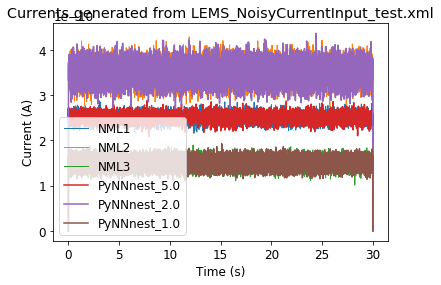

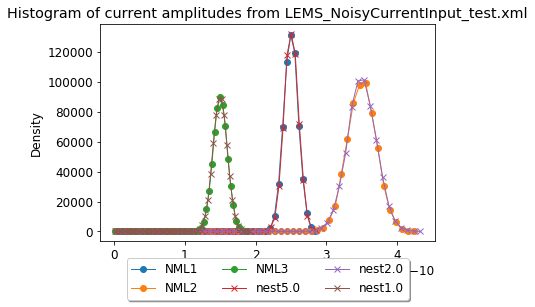

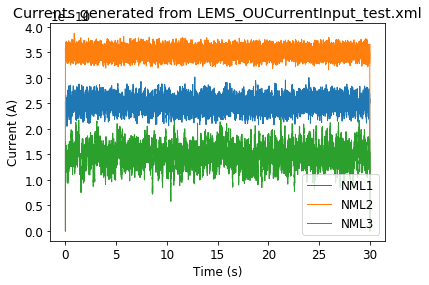

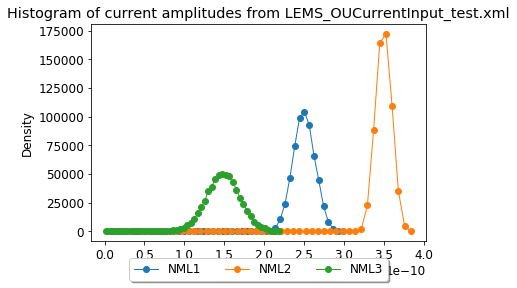

In [19]:

for lems_file in lems_files:

    results = all_results[lems_file]

    print("Reloaded data: %s"%results.keys())

        
    

    ax = pynml.generate_plot([results['t'],results['t'],results['t']],                        
                             [results['Pop0/1/IF_curr_exp/noisyCurrentSource1/i'],
                              results['Pop0/2/IF_curr_exp/noisyCurrentSource2/i'],
                             results['Pop0/3/IF_curr_exp/noisyCurrentSource3/i']],                  
                             "Currents generated from %s"%lems_file,                 
                             xaxis = 'Time (s)',          
                             yaxis = 'Current (A)',
                             labels=['NML1','NML2','NML3'],
                             title_above_plot=True,
                             show_plot_already=False)
    

    bins=50

    hist1, edges1 = numpy.histogram(results['Pop0/1/IF_curr_exp/noisyCurrentSource1/i'],bins=bins)
    mid1 = [e +(edges1[1]-edges1[0])/2 for e in edges1[:-1]]

    hist2, edges2 = numpy.histogram(results['Pop0/2/IF_curr_exp/noisyCurrentSource2/i'],bins=bins)
    mid2 = [e +(edges2[1]-edges2[0])/2 for e in edges2[:-1]]

    hist3, edges3 = numpy.histogram(results['Pop0/3/IF_curr_exp/noisyCurrentSource3/i'],bins=bins)
    mid3 = [e +(edges3[1]-edges3[0])/2 for e in edges3[:-1]]

    xs = [mid1,mid2,mid3]
    ys = [hist1, hist2, hist3]
    markers = ['o','o','o']
    labels = ['NML1','NML2','NML3']
    
    
    if "Noisy" in lems_file:
        run_in_pynn = ['nest']
        dts = [5.0,2.0,1.0]
        for sim in run_in_pynn:
            for dt in dts:
                f = '../PyNN/noise_current_%s_%s.dat'%(sim,dt)
                data, indeces = pynml.reload_standard_dat_file(f)
                ax.plot(data['t'],data[0],label='PyNN%s_%s'%(sim,dt))
                
                hist1, edges1 = numpy.histogram(data[0],bins=bins)
                mid1 = [e +(edges1[1]-edges1[0])/2 for e in edges1[:-1]]
                xs.append(mid1)
                ys.append(hist1)
                markers.append('x')
                labels.append('%s%s'%(sim,dt))
                
    ax.legend()
    

    ax = pynml.generate_plot(xs,                        
                             ys,                  
                             "Histogram of current amplitudes from %s"%lems_file,                 
                             xaxis = 'Current (A)',          
                             yaxis = 'Density',
                             title_above_plot=True,
                             markers = markers,
                             show_plot_already=False,
                             labels=labels)
        

plt.show()
                         

                         
